<a href="https://colab.research.google.com/github/luckguy/DIP2001/blob/main/DIP_ch03_ex04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 範例 3-4 直方圖等化

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

讀入影像

(-0.5, 511.5, 511.5, -0.5)

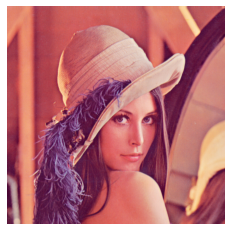

In [8]:
url='http://optipng.sourceforge.net/pngtech/img/lena.png'
img=io.imread(url)
plt.imshow(img)
plt.axis('off')

劃出灰階影像直方圖

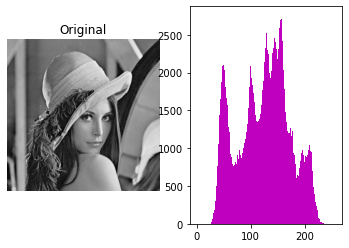

In [9]:
gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.figure
plt.subplot(121)
plt.imshow(gray,cmap='gray')
plt.title('Original')
plt.axis('off')
plt.subplot(122)
plt.hist(gray.ravel(), 256, [0, 256],color='m')
plt.show()

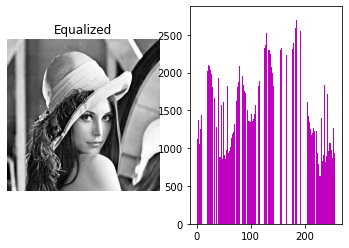

In [10]:
eq_gray=cv2.equalizeHist(gray)
plt.figure
plt.subplot(121)
plt.imshow(eq_gray,cmap='gray')
plt.title('Equalized')
plt.axis('off')
plt.subplot(122)
plt.hist(eq_gray.ravel(), 256, [0, 256],color='m')
plt.show()

計算彩色的直方圖等化結果

    1. RGB 轉 YUV (明暗與色彩分離)
    2. 對 Y 做 equalization (只做明暗成分)
    3. YUV 轉回 RGB


In [11]:
def hisEqualColor(img):
    ycrcb = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    channels = cv2.split(ycrcb)  # BGR -> YCbCr
    cv2.equalizeHist(channels[0], channels[0])  # 只對明暗進行
    cv2.merge(channels, ycrcb)  # YCbCr -> BGR
    cv2.cvtColor(ycrcb, cv2.COLOR_YUV2RGB, img)
    return img

畫出彩色的直方圖分布

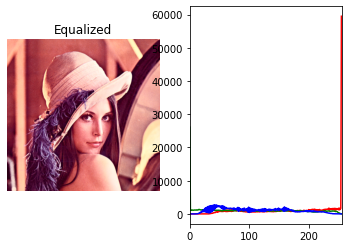

In [12]:
eq_color = hisEqualColor(img)
plt.figure()
plt.subplot(121)
plt.imshow(eq_color)
plt.axis('off'),plt.title('Equalized')
plt.subplot(122)
color = ('r','g','b')
for i, col in enumerate(color):
  histr = cv2.calcHist([eq_color],[i],None,[256],[0, 256])
  plt.plot(histr, color = col)
  plt.xlim([0, 256])
plt.show()